In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [3]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    cities = {}
    for i in range(1,len(excel)+1):
        cities[excel["city1"][i]] = (coordinates["Longitude"][excel["city1"][i]],coordinates["Latitude"][excel["city1"][i]])
        cities[excel["city2"][i]] = (coordinates["Longitude"][excel["city2"][i]],coordinates["Latitude"][excel["city2"][i]])
    for i in cities:
        G.add_node(i, pos= cities[i])
    
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
        
        max_weight = max(max_weight, weight1, weight2)
        min_weight = min(min_weight, weight1, weight2)
    graphs.append(G)
nx.write_gml(graphs[-7], "test.gml", stringizer = str)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
Raw_Data/1506.csv
Raw_Data/1507.csv
Raw_Data/1508.csv
Raw_Data/1509.csv
Raw_Data/1510.csv
Raw_Data/1511.csv
Raw_Data/1512.csv
Raw_Data/1601.csv
Raw_Data/1602.csv
Raw_Data/1603.csv
Raw_Data/1604.csv
Raw_Data/1605.csv
Raw_Data/1606.csv
Raw_Data/1607.csv
Raw_Data/1608.csv
Raw_Data/1609.csv
Raw_Data/1610.csv
Raw_Data/1611.csv
Raw_Data/1612.csv
Raw_Data/1701.csv
Raw_Data/1702.csv
Raw_Data/1703.csv
Raw_Data/1704.csv
Raw_Data/1705.csv
Raw_Data/1706.csv
Raw_Data/1707.csv
Raw_Data/1708.csv
Raw_Data/1709.csv

In [4]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [5]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [6]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    except:
        print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)

    


    plt.title("Airport Network Of India "+ lbls1[i])
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


## Network Visualization

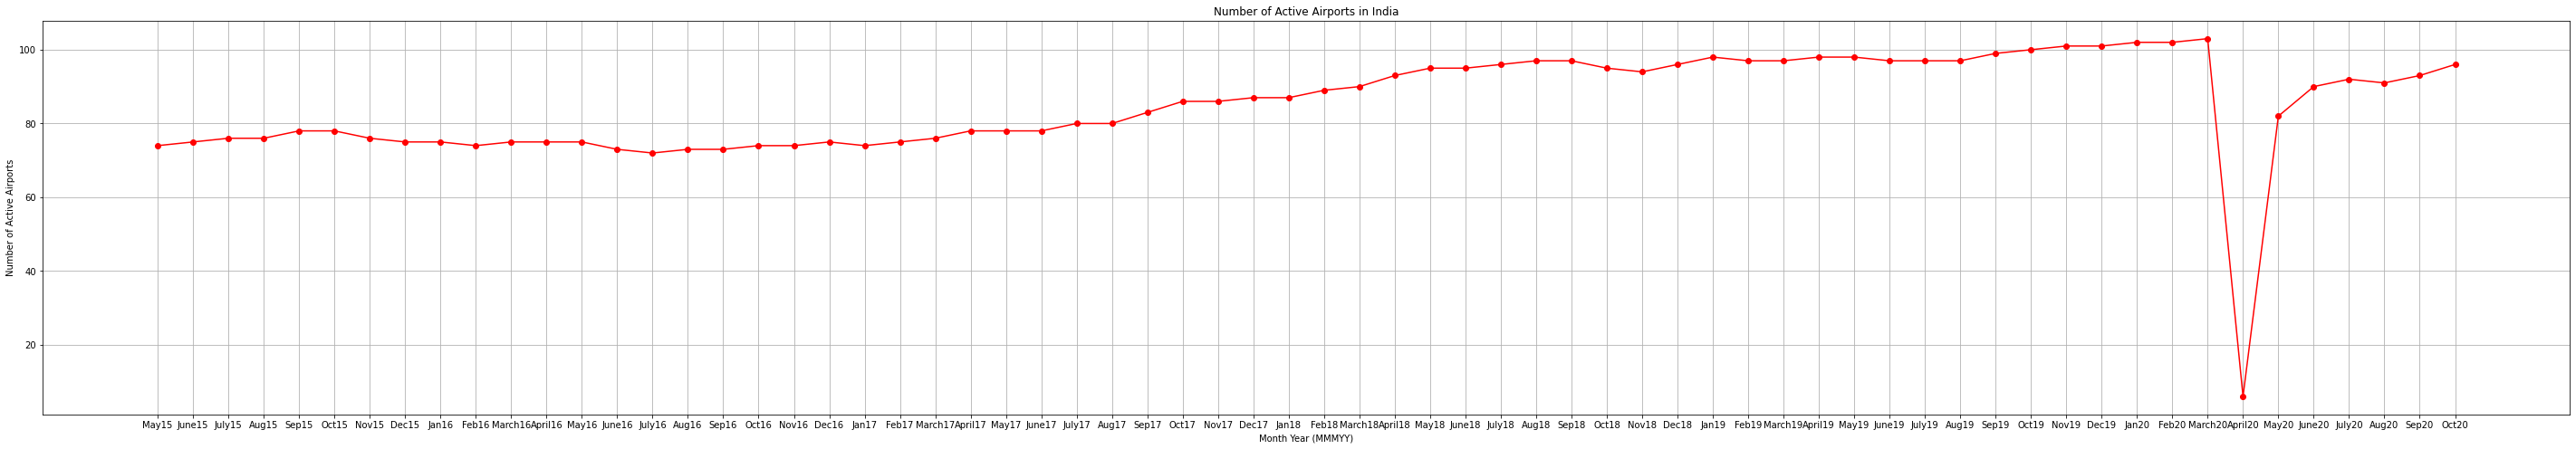

In [7]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.plot(nodes, color="red", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

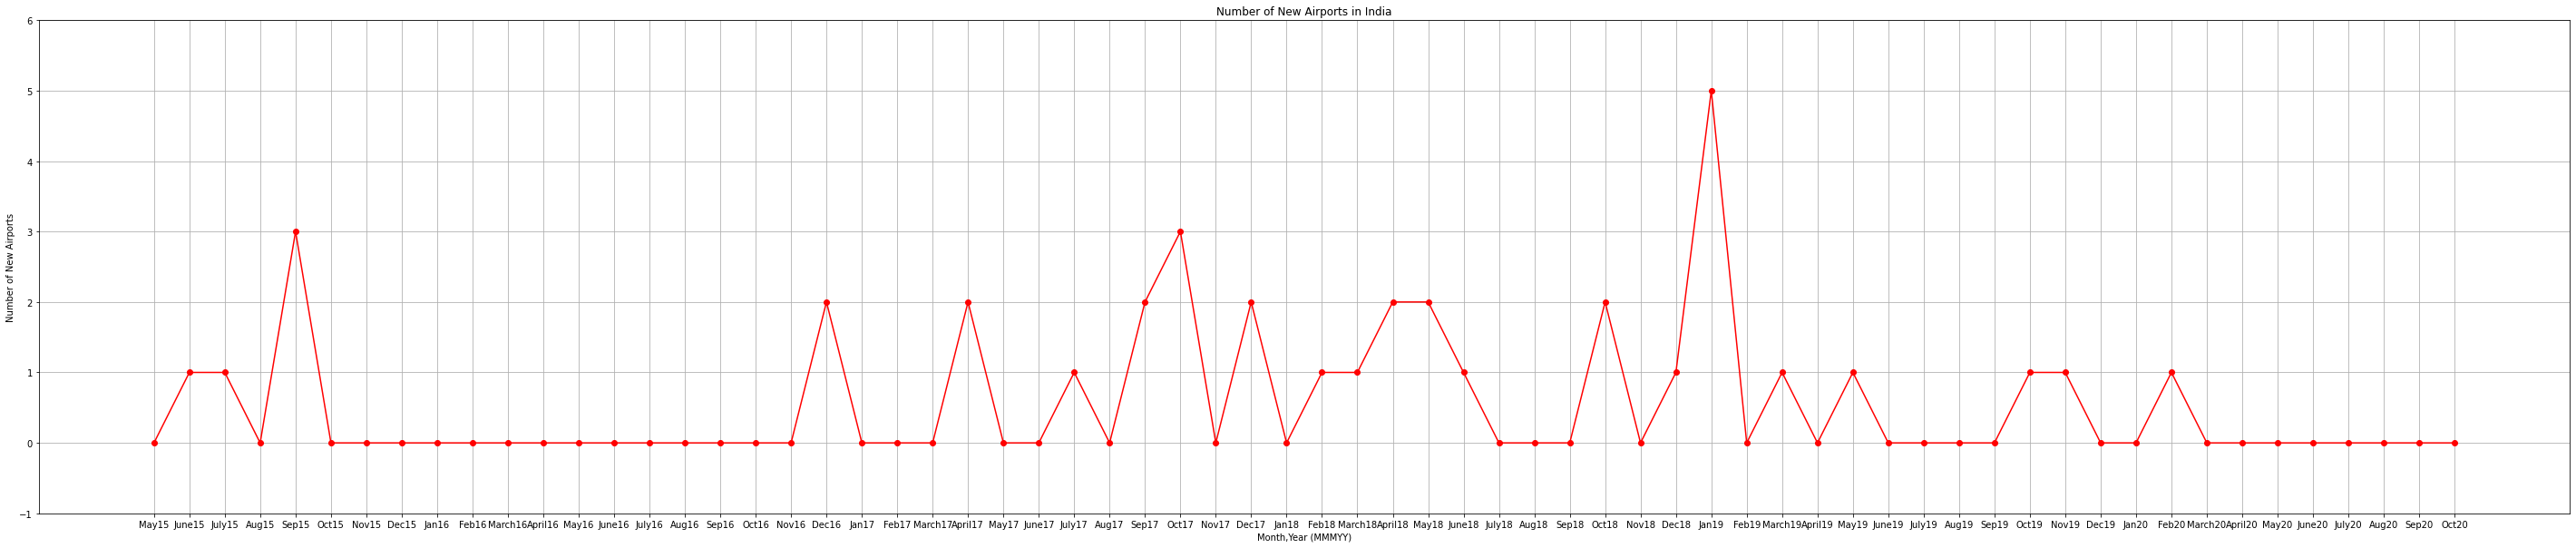

In [8]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0
plt.plot(nnodes, color="red", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()

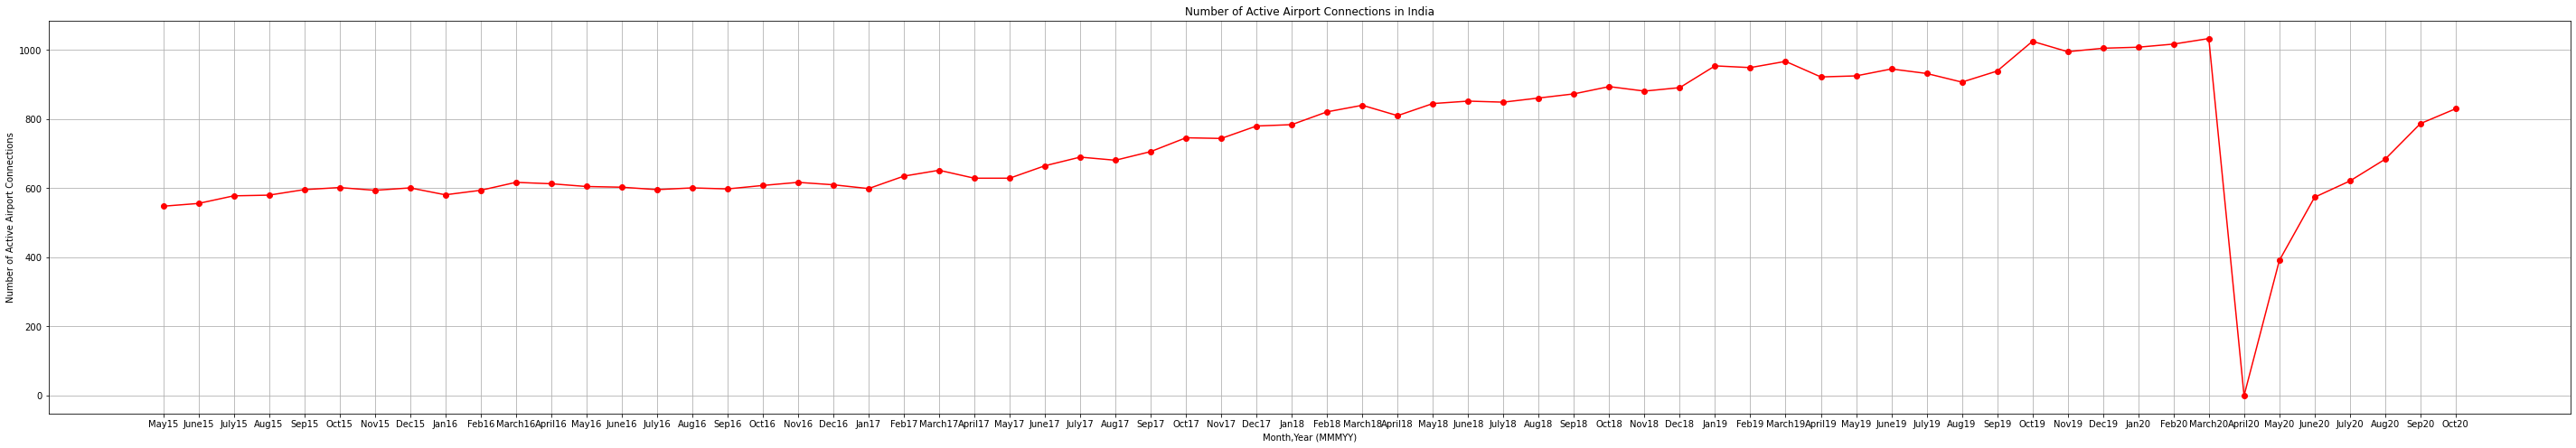

In [9]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.plot(edges, color="red", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

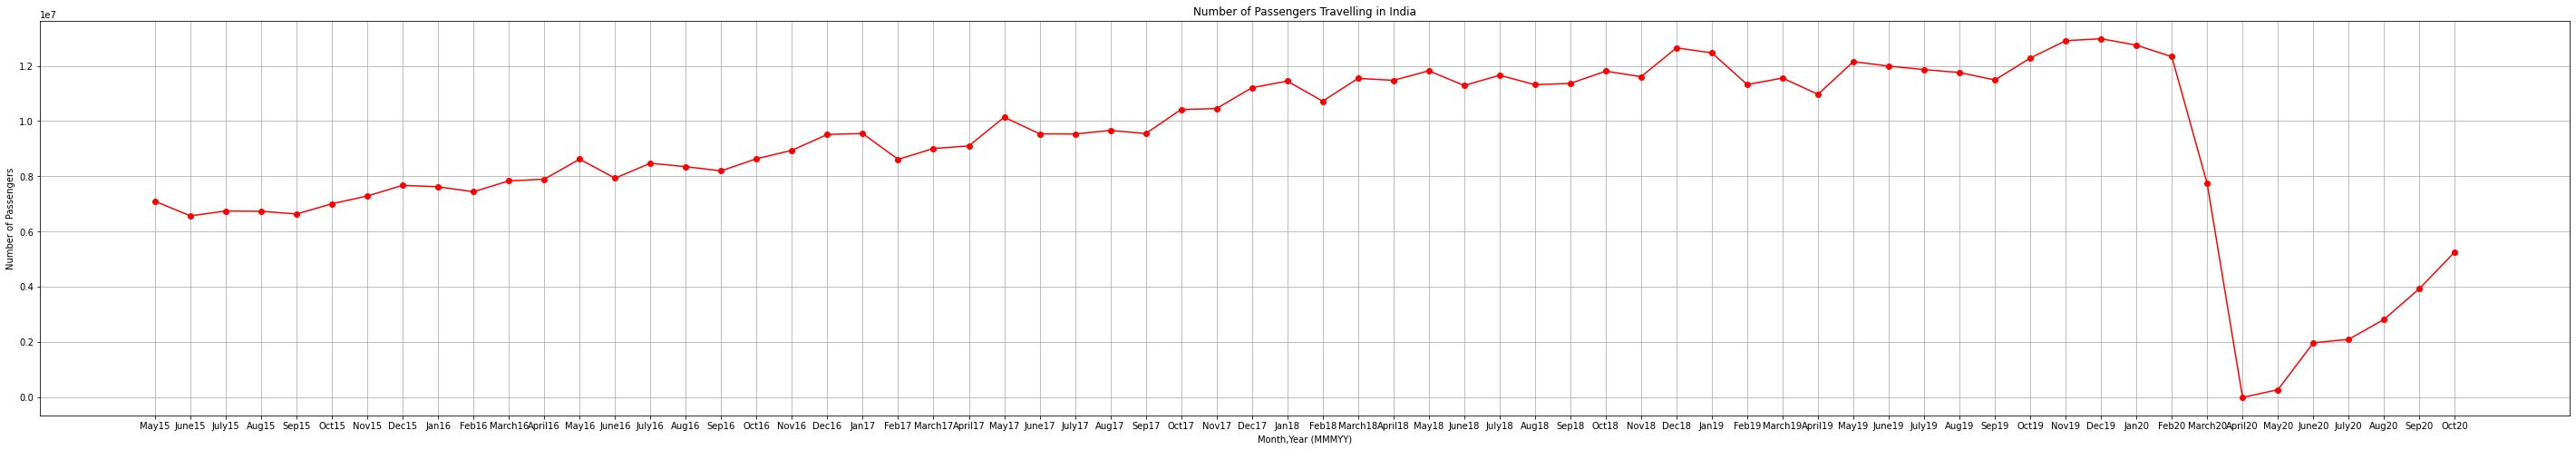

In [10]:
plt.plot(passengers, color="red",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(66)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [11]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
June15
Top 10 nodes
DELHI -> 0.347284328962411
MUMBAI -> 0.240014704227033
BENGALURU -> 0.15818270955257266
KOLKATA -> 0.13654468757208485
CHENNAI -> 0.08676250833785078
GUWAHATI -> 0.06227147168927988
HYDERABAD -> 0.04598120625517885
KOCHI -> 0.02760236184893719
SILCHAR -> 0.02702702702702703
AHMEDABAD -> 0.008529895687429935
July15
Top 10 nodes
DELHI -> 0.33858513183513167
MUMBAI -> 0.22533362558362557
BENGALURU -> 0.16823499273499282
KOLKATA -> 0.13308620958620956
CHENNAI -> 0.08914823564823564
GUWAHATI -> 0.061061578061578047
HYDERABAD -> 0.04735814210814211
KOCHI -> 0.028210214210214208
SILCHAR -> 0.02666666666666667
VARANASI -> 0.018153796653796652
Aug15
Top

Top 10 nodes
DELHI -> 0.3697375078797266
MUMBAI -> 0.21348019672200608
HYDERABAD -> 0.12218419387071655
BENGALURU -> 0.09682385142642033
KOLKATA -> 0.09048686707379924
CHENNAI -> 0.07130890244721222
GUWAHATI -> 0.0632748580533391
KOCHI -> 0.026196109191269273
INDORE -> 0.014212364054136204
KHAJURAHO -> 0.012658227848101266
Sep17
Top 10 nodes
DELHI -> 0.3881526211365036
MUMBAI -> 0.2008639387258699
HYDERABAD -> 0.11703813475493695
BENGALURU -> 0.09193585468962266
KOLKATA -> 0.0904179609137295
CHENNAI -> 0.09005681034813828
GUWAHATI -> 0.061537629947985124
KOCHI -> 0.025339475757271593
KHAJURAHO -> 0.012195121951219513
VARANASI -> 0.00714978754725819
Oct17
Top 10 nodes
DELHI -> 0.3868535798157648
MUMBAI -> 0.19500025010003996
HYDERABAD -> 0.1447209396579144
CHENNAI -> 0.09832419156473775
KOLKATA -> 0.08197666362582326
BENGALURU -> 0.06409792743826358
GUWAHATI -> 0.05872495482264389
KOCHI -> 0.02480314853214012
JAIPUR -> 0.011932166806116383
KHAJURAHO -> 0.011764705882352941
Nov17
Top 10 

Top 10 nodes
DELHI -> 0.29760778777877034
MUMBAI -> 0.16986625176670753
BENGALURU -> 0.12167532491877861
HYDERABAD -> 0.10899352729986823
KOLKATA -> 0.09063959353321241
AHMEDABAD -> 0.0829694873052305
CHENNAI -> 0.0747925616293193
GUWAHATI -> 0.05682827189373237
DEHRA DUN -> 0.022874612855597127
JAIPUR -> 0.022685307897305558
Feb20
Top 10 nodes
DELHI -> 0.2977038444480793
MUMBAI -> 0.1871189380113593
BENGALURU -> 0.14552882628665992
HYDERABAD -> 0.10748381738933742
KOLKATA -> 0.08981769998771927
CHENNAI -> 0.06561872431474068
GUWAHATI -> 0.052746696907618865
AHMEDABAD -> 0.050008611431410395
DEHRA DUN -> 0.023016893864756534
JAIPUR -> 0.022851044155594545
March20
Top 10 nodes
DELHI -> 0.28706411629490336
MUMBAI -> 0.17485701650968632
BENGALURU -> 0.14485940510967207
HYDERABAD -> 0.10603765451143549
KOLKATA -> 0.08907285934858172
AHMEDABAD -> 0.07377890003475952
CHENNAI -> 0.06539580997127001
GUWAHATI -> 0.053817463278657246
JAIPUR -> 0.023467169198929105
DEHRA DUN -> 0.0229431246622728

Degree Distribution

In [13]:
def haha(i):
    print(lbls1[i])
    G = graphs[i]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    #print(sorted_degree)

#     print("Top 10 nodes")
#     for z in range(len(sorted_degree[:10])):
#         print(sorted_degree[z][0] + " -> " + str(sorted_degree[z][1]))
    
    
    plt.figure(figsize = (100, 10))
    plt.plot( [y[1] for y in sorted_degree], color="red",  marker="o")
    plt.title("Degree sequence for " + lbls1[i])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[i])
#     plt.show()
    plt.clf()
    #f.clf()
    plt.close("all")
    #plt.close(plt)
    print("\n")
    gc.collect()
    
    
    
    clust_coefficients = nx.clustering(G)
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[i])
    plt.bar(*zip(*clust_coefficients.items()))
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[i])
#     plt.show()
    plt.clf()
    #f.clf()
    #f.clear()
    #plt.close(f)
    plt.close("all")
    #plt.close(plt)
#     print("\n")
    gc.collect()
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[i])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
#     print(degree_counter)
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
#     print(degree_counter)
    plt.plot(degree_counter.keys(), degree_counter.values(), color="red",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[i])
#     plt.show()
    plt.clf()
    #f.clf()
    #f.clear()
    #plt.close(f)
    plt.close("all")
    #plt.close(plt)
#     print("\n")
    gc.collect()
    
    
    
    plt.figure(figsize = (125, 10))
    plt.title("Clustering coeff vs Degree plot for " + lbls1[i])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.grid(True)
    degrees_coeffs = {}
    for city in clust_coefficients.keys():
        degrees_coeffs[degree_dict[city]] = clust_coefficients[city]
    degrees_coeffs = dict(sorted(degrees_coeffs.items(), key=itemgetter(0)))
    plt.plot(degrees_coeffs.keys(), degrees_coeffs.values(), color="red",  marker="o")
    plt.xticks([t for t in range(max(degrees_coeffs.keys())+1)])
    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[i])
#     plt.show()
    plt.clf()
    #f.clf()
    #f.clear()
    #plt.close(f)
    plt.close()
    #plt.close(plt)
#     print("\n")
    gc.collect()
    plt.close('all')
#     plt.show()

    
    print("Average clustering coefficient for", lbls1[i], "is", avg_clust_coeff)
for i in range(len(graphs)):
    plt.ioff()
    haha(i)
    gc.collect()

May15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 76
KOLKATA -> 66
CHENNAI -> 60
HYDERABAD -> 54
AHMEDABAD -> 35
GUWAHATI -> 32
INDORE -> 27
PUNE -> 27




{2: 15, 3: 5, 4: 5, 5: 1, 6: 9, 8: 5, 9: 4, 10: 1, 11: 1, 12: 3, 13: 1, 14: 3, 17: 2, 18: 3, 19: 3, 20: 1, 21: 1, 22: 1, 27: 2, 32: 1, 35: 1, 54: 1, 60: 1, 66: 1, 76: 1, 92: 1, 107: 1}




Average clustering coefficient for May15 is 0.6498709231340716
June15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 80
KOLKATA -> 65
CHENNAI -> 60
HYDERABAD -> 54
AHMEDABAD -> 35
GUWAHATI -> 34
INDORE -> 28
GOA -> 27




{2: 16, 3: 5, 4: 5, 5: 2, 6: 7, 7: 1, 8: 5, 9: 3, 10: 3, 11: 1, 12: 2, 13: 1, 14: 3, 17: 3, 18: 2, 19: 1, 20: 2, 22: 2, 27: 2, 28: 1, 34: 1, 35: 1, 54: 1, 60: 1, 65: 1, 80: 1, 92: 1, 107: 1}




Average clustering coefficient for June15 is 0.6434613629926142
July15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 85
KOLKATA -> 65
CHENNAI -> 62
HYDERABAD -> 61
GUWAHATI -> 34
AHMEDABAD -> 33
INDORE -> 28
PUNE -> 27






{2: 18, 3: 1, 4: 4, 5: 2, 6: 5, 7: 1, 8: 5, 9: 1, 10: 3, 11: 3, 12: 3, 13: 1, 14: 2, 15: 3, 16: 1, 17: 2, 18: 1, 19: 2, 21: 3, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 31: 2, 38: 1, 63: 1, 66: 1, 70: 1, 82: 1, 94: 1, 115: 1}




Average clustering coefficient for Dec16 is 0.6032204554676618
Jan17
Top 10 nodes
DELHI -> 115
MUMBAI -> 94
BENGALURU -> 81
KOLKATA -> 69
HYDERABAD -> 65
CHENNAI -> 60
GUWAHATI -> 38
PUNE -> 33
AHMEDABAD -> 31
GOA -> 27




{2: 17, 3: 1, 4: 4, 5: 2, 6: 7, 8: 5, 9: 1, 10: 3, 11: 4, 12: 2, 13: 1, 14: 2, 15: 2, 16: 1, 17: 2, 18: 2, 19: 1, 21: 3, 22: 1, 23: 1, 24: 1, 25: 1, 27: 1, 31: 1, 33: 1, 38: 1, 60: 1, 65: 1, 69: 1, 81: 1, 94: 1, 115: 1}




Average clustering coefficient for Jan17 is 0.6171729272012769
Feb17
Top 10 nodes
DELHI -> 119
MUMBAI -> 94
BENGALURU -> 83
KOLKATA -> 72
HYDERABAD -> 67
CHENNAI -> 62
GUWAHATI -> 41
PUNE -> 34
AHMEDABAD -> 33
GOA -> 30




{2: 16, 3: 2, 4: 5, 5: 2, 6: 4, 7: 1, 8: 4, 9: 2, 10: 2, 11: 3, 12: 4, 13: 1, 14: 3, 15: 1, 16: 2, 17





{2: 20, 3: 3, 4: 12, 5: 3, 6: 6, 8: 5, 10: 3, 11: 1, 12: 2, 13: 2, 14: 1, 15: 2, 16: 4, 17: 1, 18: 2, 20: 2, 21: 2, 22: 1, 24: 1, 25: 2, 27: 2, 29: 1, 31: 1, 33: 1, 34: 2, 36: 1, 39: 2, 41: 1, 42: 2, 43: 1, 76: 1, 80: 1, 89: 1, 91: 1, 116: 1, 137: 1}




Average clustering coefficient for June18 is 0.6177463249585887
July18
Top 10 nodes
DELHI -> 137
MUMBAI -> 116
HYDERABAD -> 90
BENGALURU -> 88
KOLKATA -> 79
CHENNAI -> 76
JAIPUR -> 45
GOA -> 43
PUNE -> 42
AHMEDABAD -> 41




{2: 20, 3: 4, 4: 12, 5: 4, 6: 6, 7: 1, 8: 4, 10: 3, 11: 3, 13: 1, 14: 3, 15: 1, 16: 1, 17: 2, 18: 3, 19: 1, 20: 1, 21: 2, 22: 1, 24: 3, 28: 3, 30: 1, 33: 1, 34: 2, 37: 1, 41: 3, 42: 1, 43: 1, 45: 1, 76: 1, 79: 1, 88: 1, 90: 1, 116: 1, 137: 1}




Average clustering coefficient for July18 is 0.6251015617840582
Aug18
Top 10 nodes
DELHI -> 137
MUMBAI -> 116
HYDERABAD -> 89
BENGALURU -> 88
KOLKATA -> 80
CHENNAI -> 76
JAIPUR -> 46
PUNE -> 45
AHMEDABAD -> 44
GOA -> 43




{2: 20, 3: 4, 4: 11, 5: 4, 6: 7, 8: 6, 10: 4,





Average clustering coefficient for Oct19 is 0.6841918975913565
Nov19
Top 10 nodes
DELHI -> 142
MUMBAI -> 121
BENGALURU -> 114
HYDERABAD -> 112
KOLKATA -> 98
CHENNAI -> 87
AHMEDABAD -> 68
GUWAHATI -> 42
DABOLIM -> 42
JAIPUR -> 41




{2: 14, 4: 13, 5: 2, 6: 9, 8: 4, 9: 4, 10: 4, 11: 2, 12: 3, 13: 2, 14: 3, 15: 3, 16: 2, 18: 3, 19: 1, 20: 1, 21: 2, 22: 2, 23: 2, 24: 2, 25: 1, 26: 2, 27: 1, 28: 2, 29: 1, 31: 3, 34: 1, 38: 1, 41: 2, 42: 2, 68: 1, 87: 1, 98: 1, 112: 1, 114: 1, 121: 1, 142: 1}




Average clustering coefficient for Nov19 is 0.6574408028545494
Dec19
Top 10 nodes
DELHI -> 142
MUMBAI -> 121
BENGALURU -> 113
HYDERABAD -> 112
KOLKATA -> 98
CHENNAI -> 87
AHMEDABAD -> 75
GUWAHATI -> 44
JAIPUR -> 43
DABOLIM -> 42




{2: 12, 3: 2, 4: 10, 5: 3, 6: 10, 8: 5, 9: 4, 10: 5, 12: 4, 13: 3, 14: 4, 15: 1, 16: 1, 17: 1, 18: 3, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 5, 27: 2, 28: 3, 29: 2, 31: 2, 33: 1, 37: 1, 41: 1, 42: 1, 43: 1, 44: 1, 75: 1, 87: 1, 98: 1, 112: 1, 113: 1, 121: 1, 142: 1}

In [17]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 548, 2: 3669, 3: 1107, 4: 78}
Characteristic Path length for 1505  is  2.1323583857830433


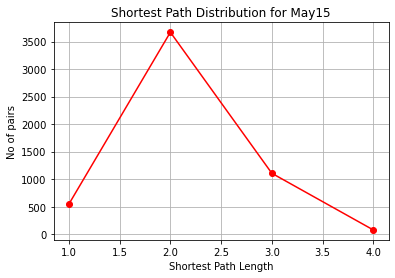



{1: 556, 2: 3747, 3: 1166, 4: 81}
Characteristic Path length for 1506  is  2.139099099099099


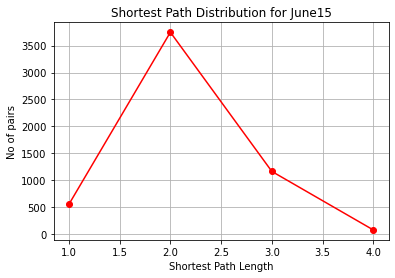



{1: 578, 2: 3784, 3: 1228, 4: 108, 5: 2}
Characteristic Path length for 1507  is  2.152982456140351


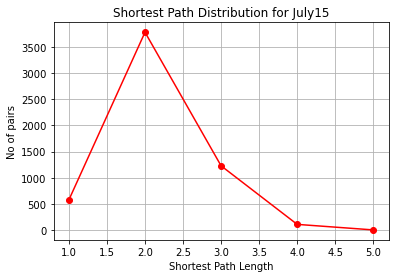



{1: 580, 2: 3824, 3: 1140, 4: 81}
Characteristic Path length for 1508  is  2.1003508771929824


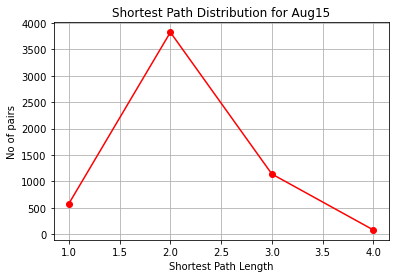



{1: 596, 2: 4221, 3: 1168, 4: 21}
Characteristic Path length for 1509  is  2.1022311022311024


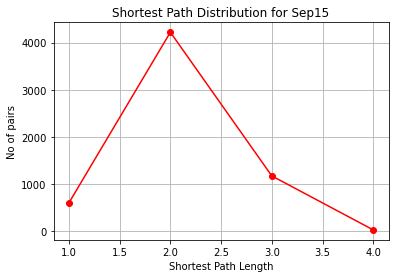



{1: 602, 2: 4076, 3: 1229, 4: 98, 5: 1}
Characteristic Path length for 1510  is  2.1375291375291376


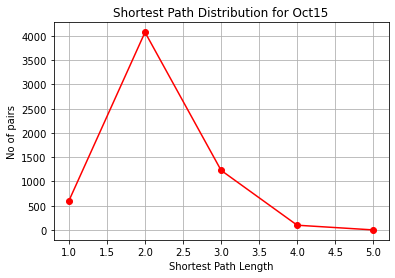



{1: 594, 2: 3874, 3: 1137, 4: 94, 5: 1}
Characteristic Path length for 1511  is  2.1287719298245613


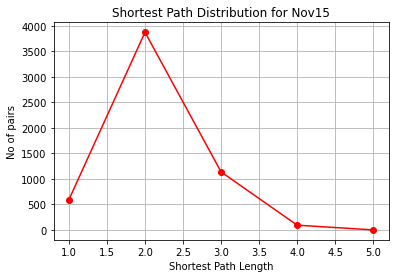



{1: 601, 2: 3952, 3: 906, 4: 17}
Characteristic Path length for 1512  is  2.0344144144144143


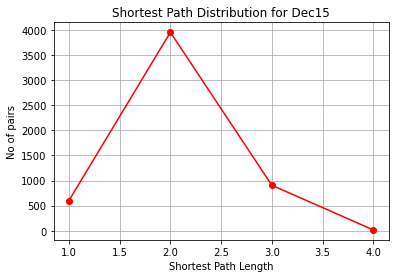



{1: 581, 2: 3970, 3: 909, 4: 16}
Characteristic Path length for 1601  is  2.0381981981981983


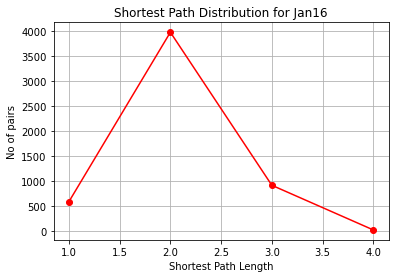



{1: 594, 2: 3924, 3: 868, 4: 16}
Characteristic Path length for 1602  is  2.056645686782673


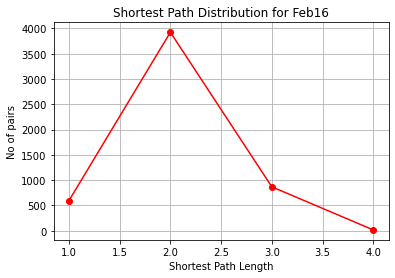



{1: 617, 2: 4042, 3: 875, 4: 16}
Characteristic Path length for 1603  is  2.052252252252252


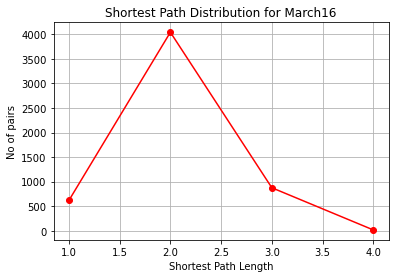



{1: 613, 2: 3787, 3: 868, 4: 60}
Characteristic Path length for 1604  is  1.9875675675675675


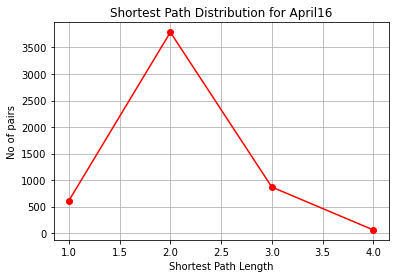



{1: 605, 2: 3818, 3: 855, 4: 50}
Characteristic Path length for 1605  is  1.983063063063063


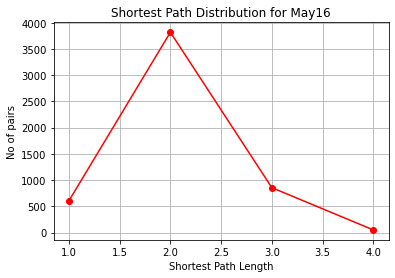



{1: 603, 2: 3672, 3: 730, 4: 35}
Characteristic Path length for 1606  is  1.955289193302892


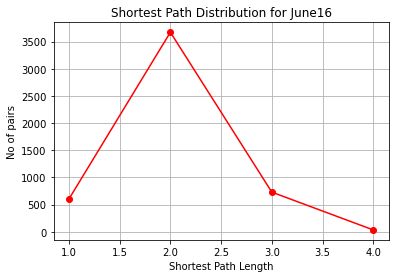



{1: 596, 2: 3554, 3: 714, 4: 35}
Characteristic Path length for 1607  is  1.9534428794992176


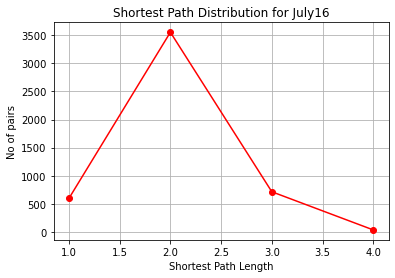



{1: 601, 2: 3643, 3: 929, 4: 82, 5: 1}
Characteristic Path length for 1608  is  2.094178082191781


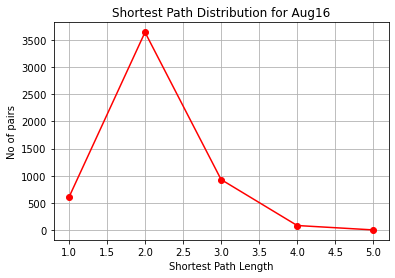



{1: 598, 2: 3665, 3: 912, 4: 80, 5: 1}
Characteristic Path length for 1609  is  2.0907534246575343


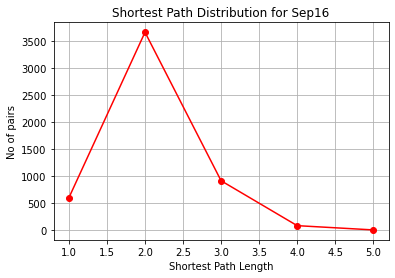



{1: 608, 2: 3672, 3: 842, 4: 60, 5: 1}
Characteristic Path length for 1610  is  1.9850055534987041


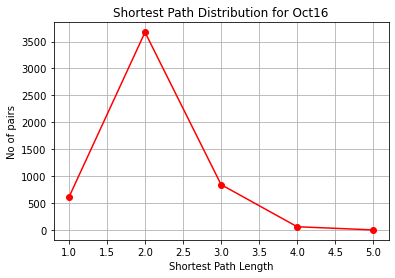



{1: 617, 2: 3734, 3: 1013, 4: 38}
Characteristic Path length for 1611  is  2.087375046279156


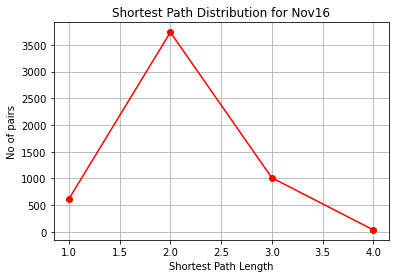



{1: 610, 2: 3847, 3: 1055, 4: 38}
Characteristic Path length for 1612  is  2.093873873873874


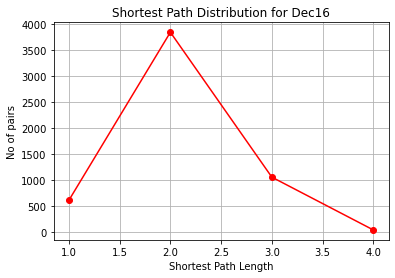



{1: 599, 2: 3829, 3: 955, 4: 19}
Characteristic Path length for 1701  is  2.0729359496482784


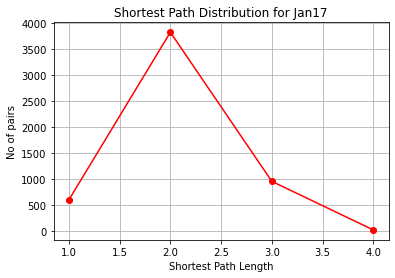



{1: 635, 2: 3970, 3: 927, 4: 18}
Characteristic Path length for 1702  is  2.059099099099099


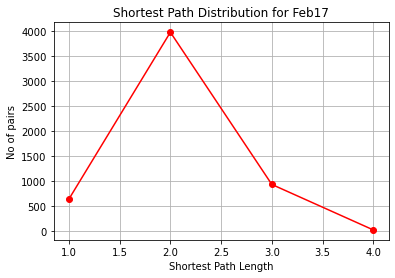



{1: 652, 2: 4092, 3: 940, 4: 16}
Characteristic Path length for 1703  is  2.056140350877193


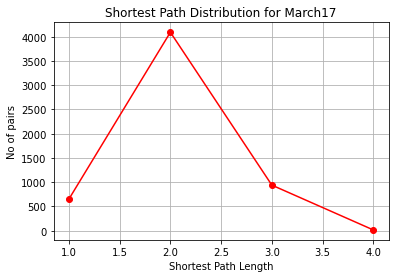



{1: 629, 2: 4215, 3: 1158, 4: 4}
Characteristic Path length for 1704  is  2.089410589410589


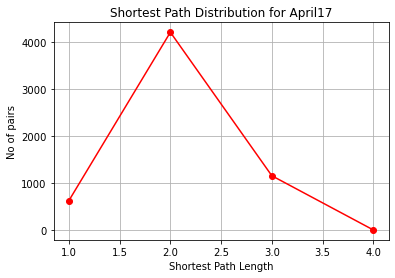



{1: 629, 2: 4251, 3: 1122, 4: 4}
Characteristic Path length for 1705  is  2.083416583416583


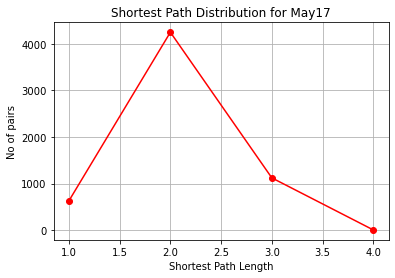



{1: 665, 2: 4190, 3: 1128, 4: 23}
Characteristic Path length for 1706  is  2.084748584748585


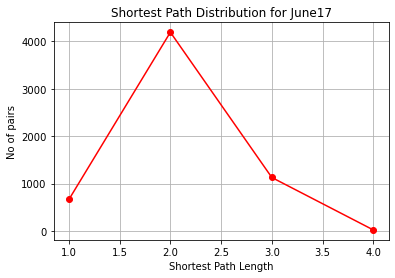



{1: 690, 2: 4381, 3: 1224, 4: 25}
Characteristic Path length for 1707  is  2.0924050632911393


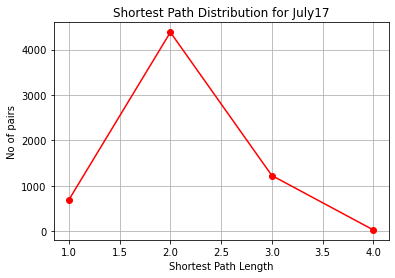



{1: 681, 2: 4314, 3: 1299, 4: 26}
Characteristic Path length for 1708  is  2.106012658227848


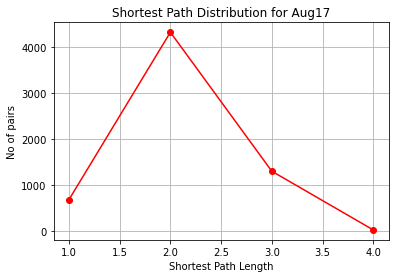



{1: 706, 2: 4659, 3: 1418, 4: 23}
Characteristic Path length for 1709  is  2.1113723185424624


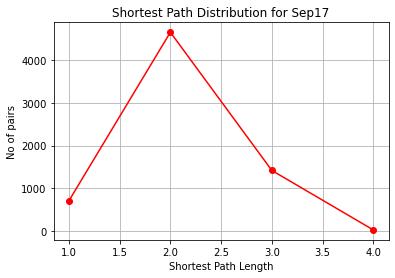



{1: 746, 2: 5029, 3: 1513, 4: 22}
Characteristic Path length for 1710  is  2.1109439124487004


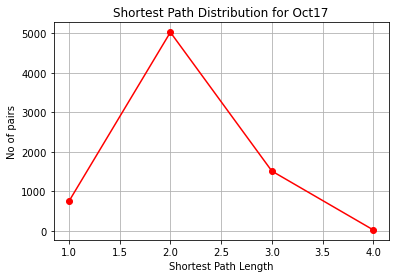



{1: 744, 2: 5076, 3: 1468, 4: 22}
Characteristic Path length for 1711  is  2.105061559507524


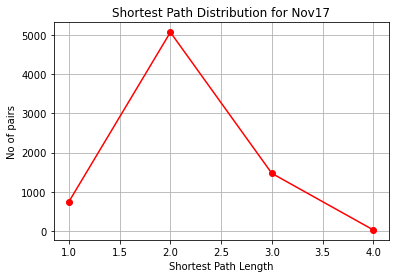



{1: 780, 2: 5219, 3: 1483}
Characteristic Path length for 1712  is  2.0939588345362203


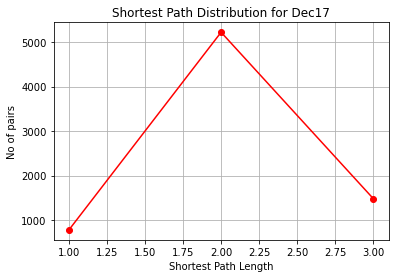



{1: 784, 2: 5235, 3: 1462, 4: 1}
Characteristic Path length for 1801  is  2.090884790163058


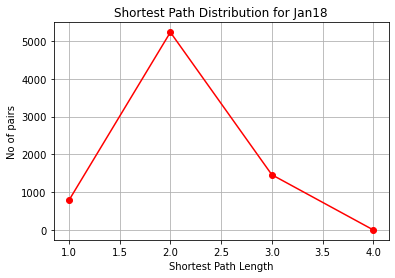



{1: 821, 2: 5440, 3: 1570, 4: 1}
Characteristic Path length for 1802  is  2.095888661899898


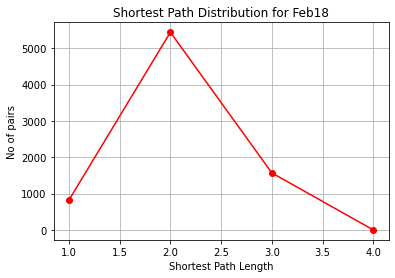



{1: 840, 2: 5581, 3: 1566, 4: 23}
Characteristic Path length for 1803  is  2.096379525593009


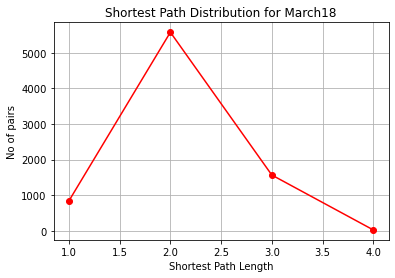



{1: 810, 2: 5966, 3: 1753, 4: 27}
Characteristic Path length for 1804  is  2.116526414212249


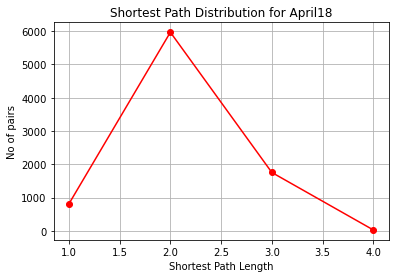



{1: 845, 2: 6303, 3: 1757, 4: 25}
Characteristic Path length for 1805  is  2.107726763717805


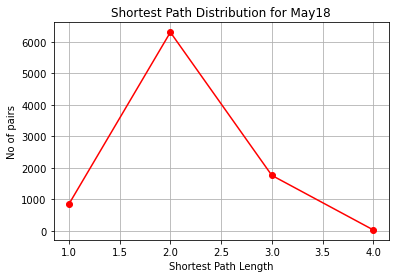



{1: 852, 2: 6216, 3: 1836, 4: 26}
Characteristic Path length for 1806  is  2.116013437849944


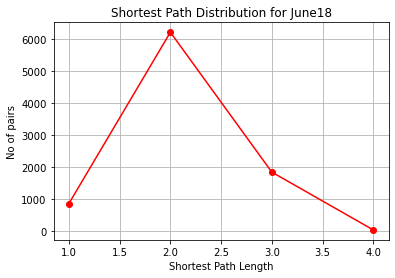



{1: 849, 2: 6295, 3: 1919, 4: 57}
Characteristic Path length for 1807  is  2.1298245614035087


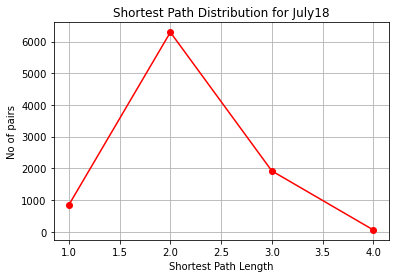



{1: 861, 2: 6325, 3: 2067, 4: 59}
Characteristic Path length for 1808  is  2.1421821305841924


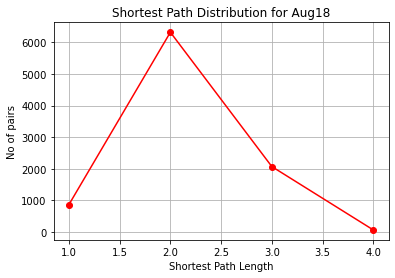



{1: 873, 2: 6333, 3: 2048, 4: 58}
Characteristic Path length for 1809  is  2.138638316151203


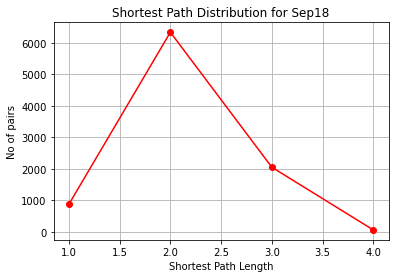



{1: 894, 2: 6406, 3: 1630}
Characteristic Path length for 1810  is  2.0824188129899217


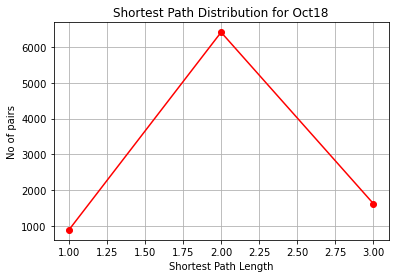



{1: 881, 2: 6074, 3: 1510}
Characteristic Path length for 1811  is  2.008579272477694


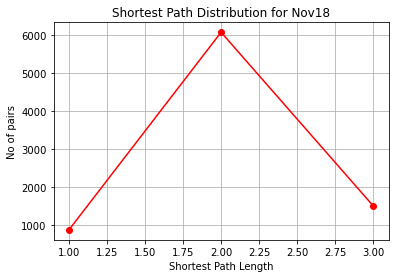



{1: 891, 2: 6326, 3: 1620}
Characteristic Path length for 1812  is  2.017872807017544


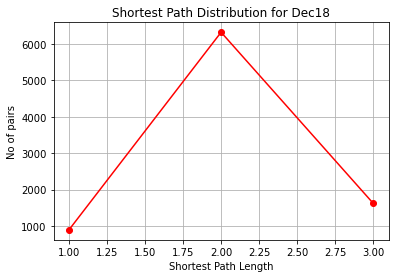



{1: 954, 2: 6648, 3: 1842, 4: 61, 5: 1}
Characteristic Path length for 1901  is  2.106564275194614


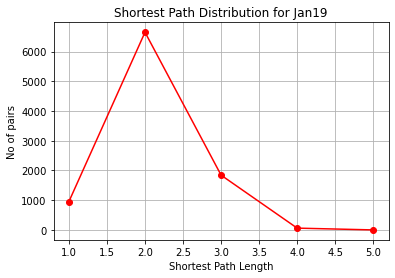



{1: 949, 2: 6393, 3: 1677, 4: 7}
Characteristic Path length for 1902  is  2.0182560137457046


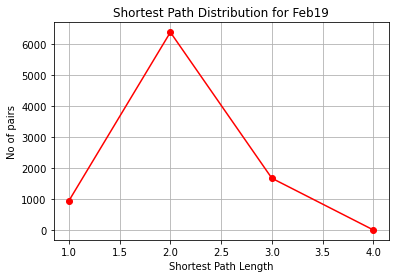



{1: 967, 2: 6584, 3: 1761}
Characteristic Path length for 1903  is  2.085266323024055


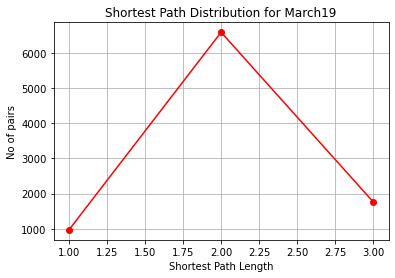



{1: 922, 2: 6586, 3: 1947, 4: 51}
Characteristic Path length for 1904  is  2.118556701030928


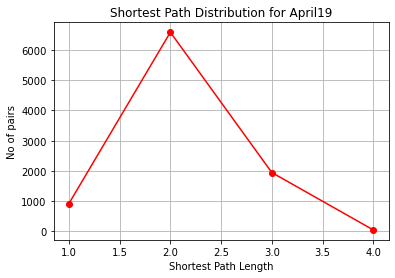



{1: 925, 2: 6610, 3: 1919, 4: 52}
Characteristic Path length for 1905  is  2.115505996212918


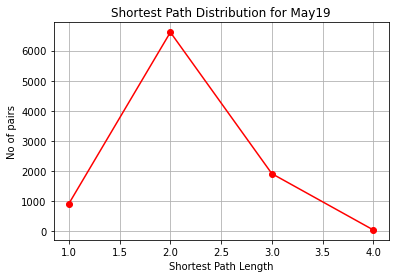



{1: 945, 2: 6528, 3: 1789, 4: 50}
Characteristic Path length for 1906  is  2.1013745704467355


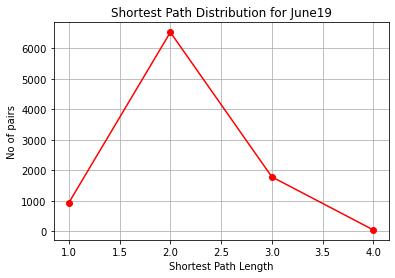



{1: 932, 2: 6494, 3: 1790}
Characteristic Path length for 1907  is  2.071520618556701


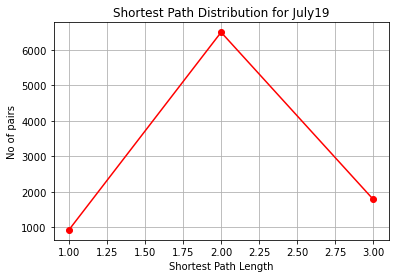



{1: 907, 2: 6584, 3: 1821}
Characteristic Path length for 1908  is  2.098152920962199


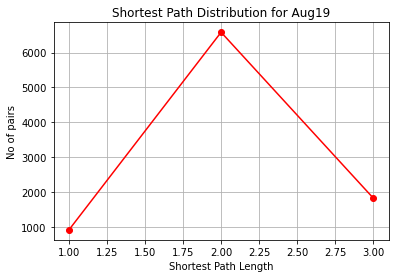



{1: 939, 2: 6830, 3: 1920, 4: 13}
Characteristic Path length for 1909  is  2.103793032364461


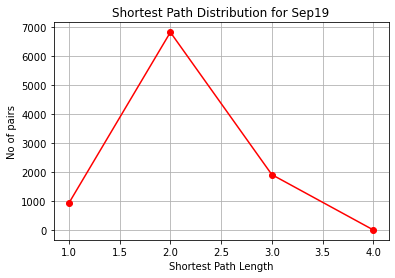



{1: 1025, 2: 6974, 3: 1729, 4: 171, 5: 1}
Characteristic Path length for 1910  is  2.105959595959596


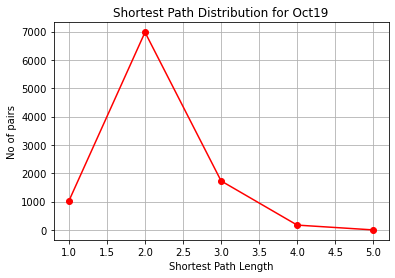



{1: 995, 2: 7084, 3: 1978, 4: 43}
Characteristic Path length for 1911  is  2.1058415841584157


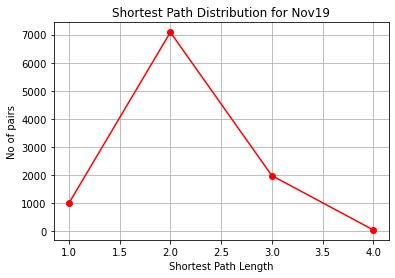



{1: 1005, 2: 7075, 3: 1977, 4: 43}
Characteristic Path length for 1912  is  2.104752475247525


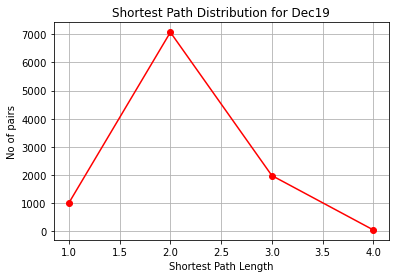



{1: 1008, 2: 7061, 3: 2186, 4: 47}
Characteristic Path length for 2001  is  2.1234711706464764


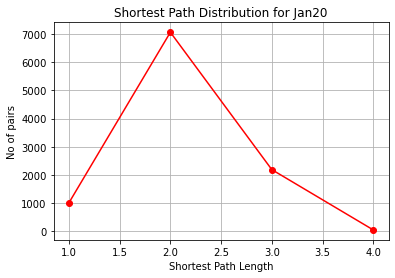



{1: 1017, 2: 7061, 3: 2177, 4: 47}
Characteristic Path length for 2002  is  2.1217239370995924


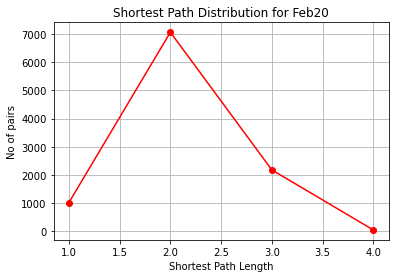



{1: 1033, 2: 7099, 3: 2327, 4: 47}
Characteristic Path length for 2003  is  2.132114981915096


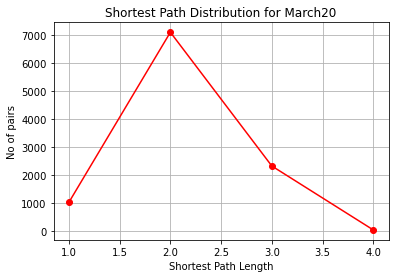



{}


NetworkXError: Graph is not weakly connected.

In [14]:
for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.grid(True)
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="red",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

